In [1]:
import logging

from utils import logging as lg


lg.set_logging(logging.DEBUG)

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean


tf.logging.set_verbosity(tf.logging.ERROR)

import math

from utils import data_provider
from utils import experiment_artifact
from utils import network_architecture

from notebook_utils import plot
from model import s2_network, s3_network, deep_4l_network, convdeep_4l_network, provider as model_provider

from heatmap_tutorial import modules, utils
import matplotlib.gridspec as gridspec

plot.setup()


2018-02-11 12:51:27,368 | DEBUG : plot.py(setup 17) - Setup plot parameters


# Preparation

## Data Loader

In [3]:
dataset = {
    'mnist': data_provider.MNISTData(dir_path='../data/mnist'),
    'fashion-mnist': data_provider.FashionMNISTData(dir_path='../data/fashion-mnist')
}

2018-02-11 12:51:27,374 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/mnist : train
2018-02-11 12:51:28,158 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/mnist : test
2018-02-11 12:51:28,552 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/fashion-mnist : train
2018-02-11 12:51:29,049 | DEBUG : data_provider.py(get_mnist 22) - Load ../data/fashion-mnist : test


## Functions

In [6]:
def model_path(network, dataset, seq):
    return '../final-models/%s_network-%s-seq-%d' % (network, dataset, seq)

In [7]:
x = np.ones((5,28,28))
x[0,:,:] = x[0,:,:]*0
x[1,:,:] = -x[1,:,:]
print(x)
y = np.zeros((5, 10))
y[:, 0] = 1

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[-1. -1. -1. ..., -1. -1. -1.]
  [-1. -1. -1. ..., -1. -1. -1.]
  [-1. -1. -1. ..., -1. -1. -1.]
  ..., 
  [-1. -1. -1. ..., -1. -1. -1.]
  [-1. -1. -1. ..., -1. -1. -1.]
  [-1. -1. -1. ..., -1. -1. -1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1. 

In [8]:
x[3,:, :], y[3, :] = dataset['mnist'].get_samples_for_vis(1)

In [26]:
x[4,:, :], y[4, :] = 0.01*x[3,:, :], y[3, :]

2018-02-11 13:03:18,649 | DEBUG : provider.py(load 10) - Load network from ../final-models/s2_network-mnist-seq-1
2018-02-11 13:03:18,654 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9803000092506409, 'seq_length': 1, 'architecture': 'hidden:768|out:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9793333411216736, 'column_at_a_time': 28, 'experiment_name': 's2_network-mnist-seq-1---2018-01-29--00-37-19', 'lr': 0.0001, 'epoch': 200, 'dataset': 'mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 's2_network'}
2018-02-11 13:03:18,656 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9803000092506409, 'seq_length': 1, 'architecture': 'hidden:768|out:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9793333411216736, 'column_at_a_time': 28, 'experiment_name': 's2_network-mnist-seq-1---2018-01-29--00-37-19', 'lr': 0.0001, 'epoch': 200, 'dataset': 'mnist'

debug
[  0.           3.432616     0.          45.98379517   0.35462832]
[  0.           3.43261596   0.          45.98380416   0.35462832]
Relevance score for 0  : 0.0000
Relevance score for 1  : 37.8088
Relevance score for 2  : 59.7662
Relevance score for 3  : 81.4940
Relevance score for 4  : 67.0069
Relevance score for 0  : 0.0000
Relevance score for 1  : 3.4326
Relevance score for 2  : 0.0000
Relevance score for 3  : 45.9838
Relevance score for 4  : 0.3546


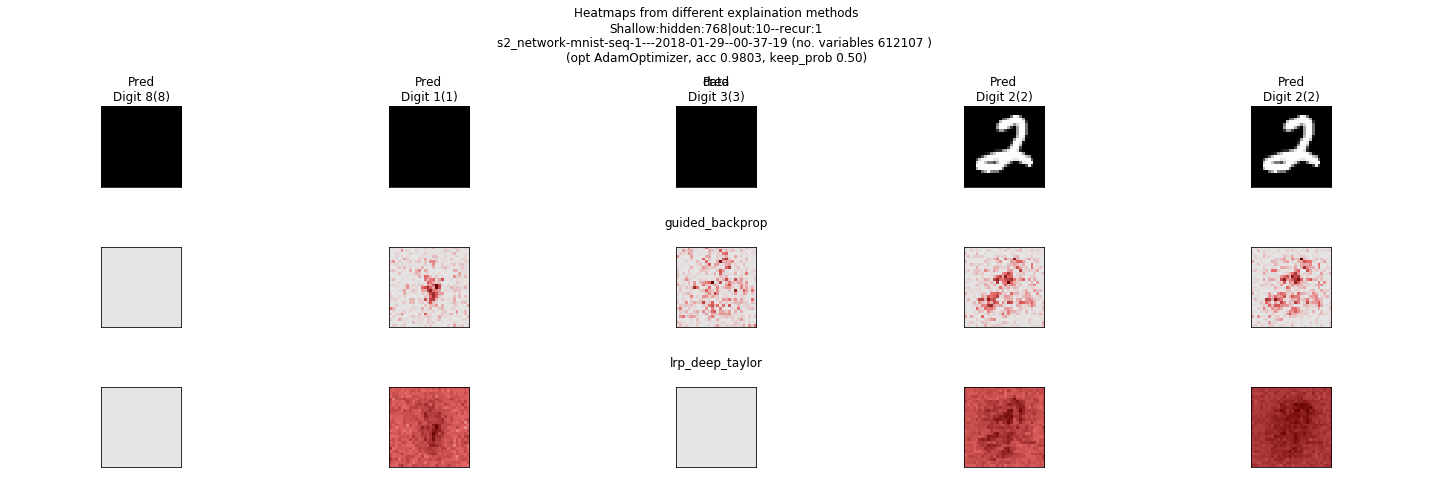

In [27]:
plot.plot_relevance_methods(model_path('s2', 'mnist', 1), dataset['mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

2018-02-11 13:03:23,444 | DEBUG : provider.py(load 10) - Load network from ../final-models/s3_network-mnist-seq-1
2018-02-11 13:03:23,453 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9786999821662903, 'seq_length': 1, 'architecture': 'in1:512|hidden:256|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9784166812896729, 'column_at_a_time': 28, 'experiment_name': 's3_network-mnist-seq-1---2018-01-29--01-07-05', 'lr': 0.0002, 'epoch': 200, 'dataset': 'mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 's3_network'}
2018-02-11 13:03:23,454 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9786999821662903, 'seq_length': 1, 'architecture': 'in1:512|hidden:256|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9784166812896729, 'column_at_a_time': 28, 'experiment_name': 's3_network-mnist-seq-1---2018-01-29--01-07-05', 'lr': 0.0002

debug
[  0.           0.          17.49809265  38.87371063   0.20848656]
[  0.           0.          17.49809225  38.8737097    0.20848654]
Relevance score for 0  : 0.0000
Relevance score for 1  : 8.6625
Relevance score for 2  : 90.9727
Relevance score for 3  : 147.6725
Relevance score for 4  : 135.2863
Relevance score for 0  : 0.0000
Relevance score for 1  : 0.0000
Relevance score for 2  : 17.4981
Relevance score for 3  : 38.8737
Relevance score for 4  : 0.2085


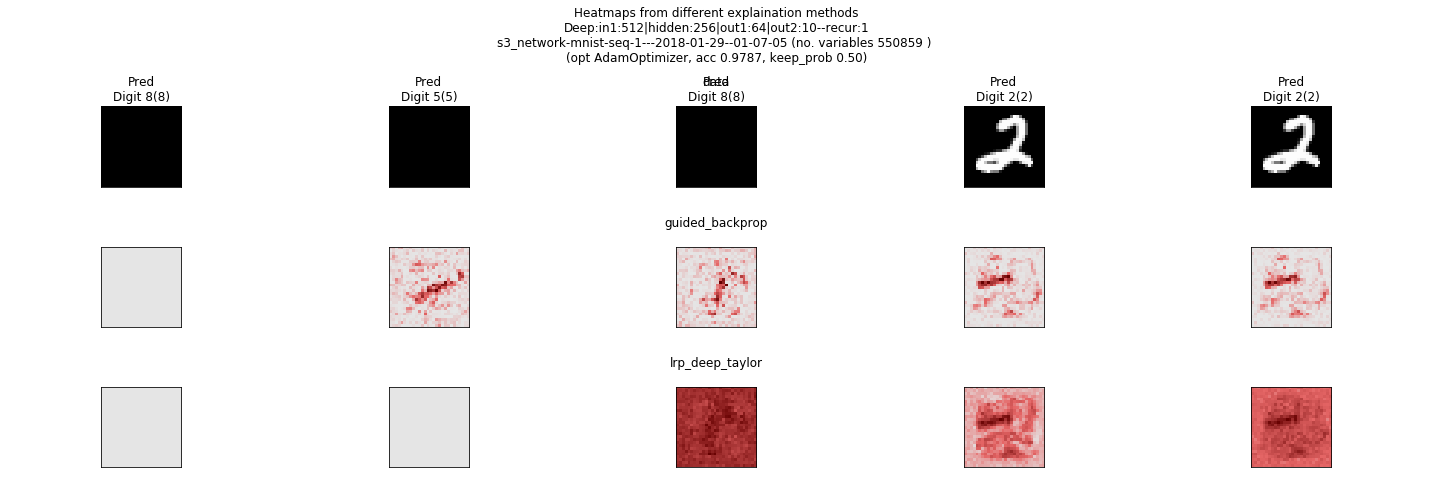

In [28]:
plot.plot_relevance_methods(model_path('s3', 'mnist', 1), dataset['mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

2018-02-11 13:03:29,805 | DEBUG : provider.py(load 10) - Load network from ../final-models/deep_4l_network-mnist-seq-1
2018-02-11 13:03:29,811 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9789000153541565, 'seq_length': 1, 'architecture': 'in1:512|in2:256|hidden:128|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9775000214576721, 'column_at_a_time': 28, 'experiment_name': 'deep_4l_network-mnist-seq-1---2018-01-29--01-45-49', 'lr': 0.0001, 'epoch': 200, 'dataset': 'mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 'deep_4l_network'}
2018-02-11 13:03:29,812 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9789000153541565, 'seq_length': 1, 'architecture': 'in1:512|in2:256|hidden:128|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9775000214576721, 'column_at_a_time': 28, 'experiment_name': 'deep_4l_network-mnist-seq-1--

debug
[  0.           0.          47.30056763  88.30387115   0.26723439]
[  0.           0.          47.30056696  88.30385343   0.2672344 ]
Relevance score for 0  : 0.0000
Relevance score for 1  : 81.9188
Relevance score for 2  : 401.5627
Relevance score for 3  : 1984.6992
Relevance score for 4  : 933.3921
Relevance score for 0  : 0.0000
Relevance score for 1  : 0.0000
Relevance score for 2  : 47.3006
Relevance score for 3  : 88.3039
Relevance score for 4  : 0.2672


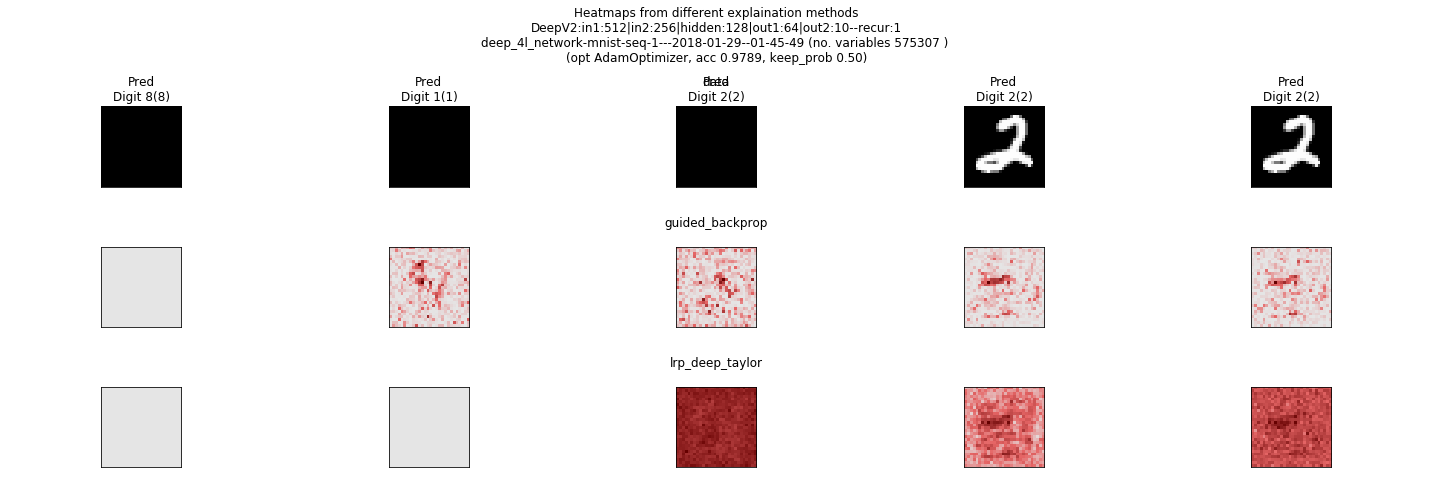

In [29]:
plot.plot_relevance_methods(model_path('deep_4l', 'mnist', 1), dataset['mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

2018-02-11 13:02:56,008 | DEBUG : provider.py(load 10) - Load network from ../final-models/convdeep_4l_network-mnist-seq-1
2018-02-11 13:02:56,015 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9944000244140625, 'seq_length': 1, 'architecture': 'conv1:5x5x24=>2x2[2,2]|conv2:3x3x48=>2x2[2,2]|hidden:256|out1:128|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9931666851043701, 'column_at_a_time': 28, 'experiment_name': 'convdeep_4l_network-mnist-seq-1---2018-01-29--23-20-56', 'lr': 0.0001, 'epoch': 200, 'dataset': 'mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 'convdeep_4l_network'}
2018-02-11 13:02:56,017 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9944000244140625, 'seq_length': 1, 'architecture': 'conv1:5x5x24=>2x2[2,2]|conv2:3x3x48=>2x2[2,2]|hidden:256|out1:128|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9931666851043701,

debug
[  0.           0.          29.15240288  32.70485306   0.        ]
[  0.           0.          29.15240131  32.70485327   0.        ]
Relevance score for 0  : 0.0000
Relevance score for 1  : 0.3421
Relevance score for 2  : 110.4361
Relevance score for 3  : 56.7427
Relevance score for 4  : 0.0000
Relevance score for 0  : 0.0000
Relevance score for 1  : 0.0000
Relevance score for 2  : 29.1524
Relevance score for 3  : 32.7049
Relevance score for 4  : 0.0000


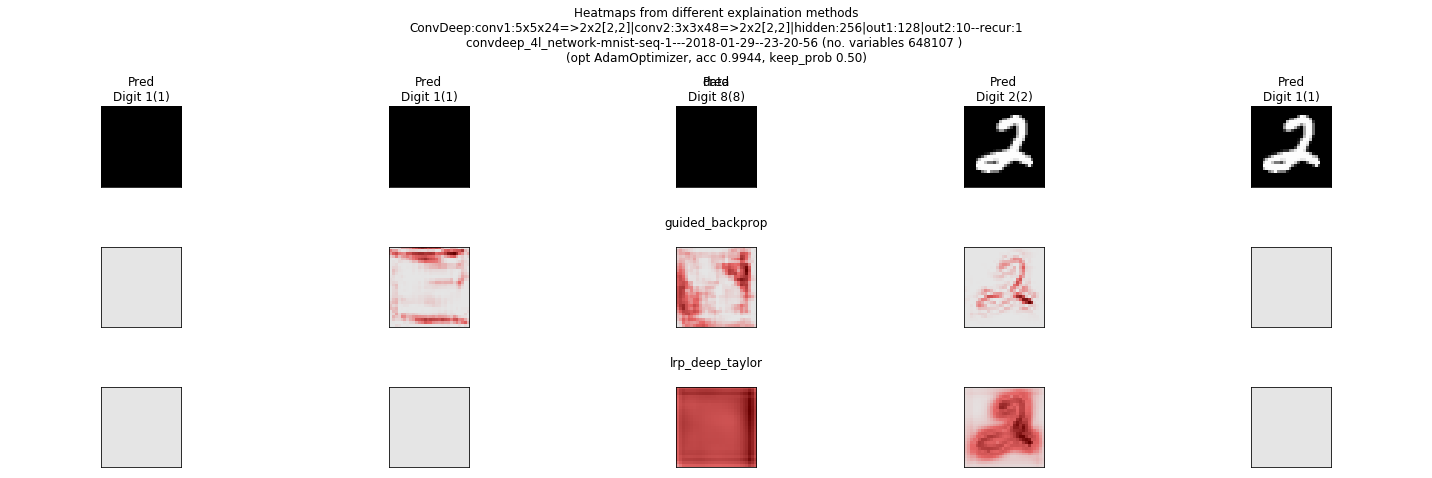

In [25]:
plot.plot_relevance_methods(model_path('convdeep_4l', 'mnist', 1), dataset['mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

2018-02-11 12:58:05,919 | DEBUG : provider.py(load 10) - Load network from ../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53
2018-02-11 12:58:05,925 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9258999824523926, 'seq_length': 1, 'architecture': 'conv1:5x5x32=>2x2[2,2]|conv2:5x5x64=>2x2[2,2]|hidden:128|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9295833110809326, 'column_at_a_time': 28, 'experiment_name': 'convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53', 'lr': 0.0001, 'epoch': 200, 'dataset': 'fashion-mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 'convdeep_4l_network'}
2018-02-11 12:58:05,926 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9258999824523926, 'seq_length': 1, 'architecture': 'conv1:5x5x32=>2x2[2,2]|conv2:5x5x64=>2x2[2,2]|hidden:128|out1:64|

debug
[ 0.          9.15910435  1.09617496  0.          0.        ]
[ 0.          9.15910379  1.0961749   0.          0.        ]
Relevance score for 0  : 0.0000
Relevance score for 1  : 27.8794
Relevance score for 2  : 4.6331
Relevance score for 3  : 19.1991
Relevance score for 4  : 40.0230
Relevance score for 0  : 0.0000
Relevance score for 1  : 9.1591
Relevance score for 2  : 1.0962
Relevance score for 3  : 0.0000
Relevance score for 4  : 0.0000


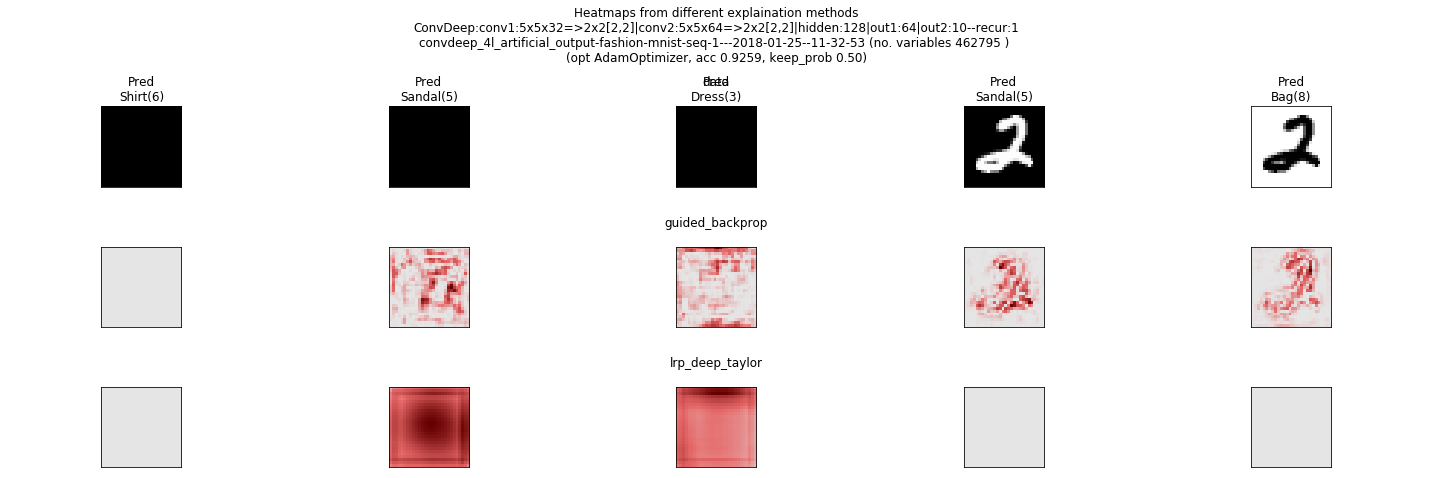

In [15]:
plot.plot_relevance_methods('../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53',
                            dataset['fashion-mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

In [16]:
plot.plot_relevance_methods('../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13',
                            dataset['fashion-mnist'], data=(x,y),
                            methods=['guided_backprop', 'lrp_deep_taylor'], verbose=True) 

2018-02-11 12:58:13,340 | DEBUG : provider.py(load 10) - Load network from ../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13
2018-02-11 12:58:13,347 | DEBUG : experiment_artifact.py(get_result 68) - Getting result 
{'accuracy': 0.9277999997138977, 'seq_length': 1, 'architecture': 'conv1:5x5x32=>2x2[2,2]|conv2:5x5x64=>2x2[2,2]|hidden:128|out1:64|out2:10--recur:1', 'optimizer': 'AdamOptimizer', 'val_accuracy': 0.9299166798591614, 'column_at_a_time': 28, 'experiment_name': 'convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13', 'lr': 0.0001, 'epoch': 200, 'dataset': 'fashion-mnist', 'regularizer': 0.0, 'max_seq_length': 28, 'dims': 28, 'batch': 50, 'keep_prob': 0.5, 'architecture_name': 'convdeep_4l_artificial_output'}
2018-02-11 12:58:13,348 | DEBUG : experiment_artifact.py(get_result 69) - {'accuracy': 0.9277999997138977, 'seq_length': 1, 'architecture': 'conv1:5x5x32=>2x2[2,2]|conv2:5x5x64=>2x2[2,2]|hidden:12

KeyError: 'convdeep_4l_artificial_output'

In [25]:
np

<module 'numpy' from '/Users/heytitle/projects/heatmapping-tutorial/venv/lib/python3.5/site-packages/numpy/__init__.py'>

In [27]:
np.trapz([1,1, -1, -1])

0.0